In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from boruta import BorutaPy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("..\\dataset_machine_learning.csv")

In [3]:
df

,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,yr_built,renovated,yr_renovated,zipcode,city_encoded,lat,long,sqm_living15,sqm_lot15
0,0,790000,3,2.50,241.55,441.29,1.0,False,0,4,9,1951,False,1951,98117,11,47.6833,-122.400,221.11,441.29
1,0,555000,4,2.50,307.51,603.87,2.0,False,0,3,8,2012,False,2012,98065,15,47.5150,-121.870,221.11,464.52
2,0,440000,4,2.25,200.67,754.28,1.0,False,0,3,8,1966,False,1966,98006,21,47.5443,-122.177,171.87,836.13
3,0,295000,2,2.50,151.43,127.09,2.0,False,0,3,7,2009,False,2009,98106,11,47.5489,-122.363,147.72,214.23
4,0,470000,5,2.50,205.32,896.98,1.0,False,0,3,8,1976,False,1976,98011,14,47.7698,-122.222,193.24,802.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19251,377,183000,3,1.00,108.70,680.05,1.0,False,0,3,7,1962,False,1962,98188,11,47.4685,-122.282,189.52,680.05
19252,377,359000,2,2.75,127.28,105.91,2.0,False,0,3,8,2009,False,2009,98133,11,47.7052,-122.343,127.28,101.26
19253,378,450000,5,2.00,173.73,682.28,1.5,False,0,3,7,1960,False,1960,98007,21,47.5951,-122.144,173.73,710.71
19254,387,445500,2,1.75,129.14,619.66,1.0,False,0,3,6,1941,False,1941,98115,11,47.6914,-122.308,85.47,592.72


In [4]:
X1 = df['sqm_living'].values.reshape(-1,1)
X2 = df['grade'].values.reshape(-1,1)
X3 = df[['grade', 'sqm_living']]
X4 = df.drop(columns=['price'])
y = df['price'].values.reshape(-1,1)

df_mean_price = df.groupby('grade').agg(mean_price=('price', 'mean'))

Xmean = df_mean_price.index.values.reshape(-1,1)
ymean = df_mean_price['mean_price'].values.reshape(-1,1)

In [5]:
LinearRegression_model = LinearRegression()
poly_model = PolynomialFeatures(6)
linear_model_for_poly = LinearRegression()
RandomForest_model = RandomForestRegressor(max_depth=2)
model_SVR = SVR( kernel = 'linear' , gamma = 'auto')
knn_model = KNeighborsRegressor(n_neighbors=3)

### Feature `sqm_living`

Regression linéaire

RMSE : 238242.5239297692
R2 : 0.4700649106288569


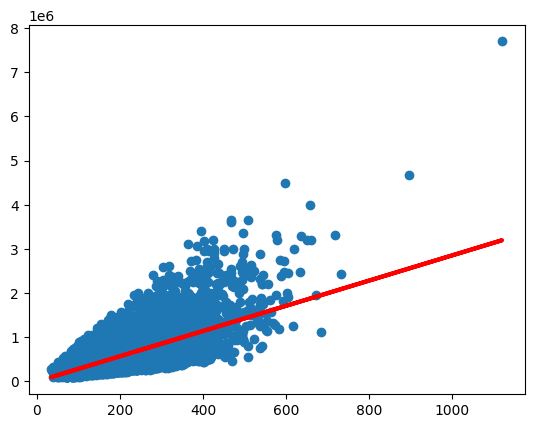

In [6]:
LinearRegression_model.fit(X1,y)



prediction_linear_living = LinearRegression_model.predict(X1)
plt.scatter(X1,y)
plt.plot(X1, prediction_linear_living, c="r", lw=3)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_linear_living))}')
print(f'R2 : {r2_score(y, prediction_linear_living)}')

Regression polynomiale

RMSE : 226905.46320473167
R2 : 0.5193001136651764


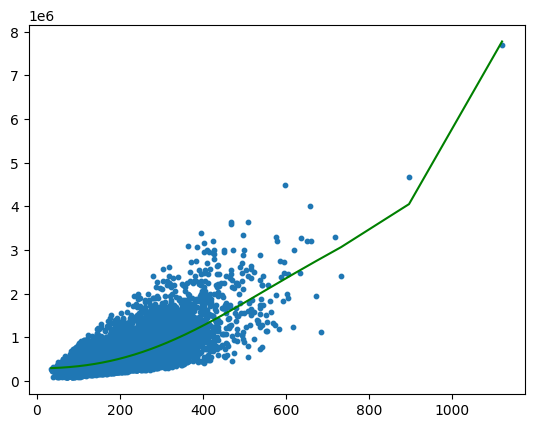

In [7]:
x_poly = poly_model.fit_transform(X1)

linear_model_for_poly.fit(x_poly, y)
y_poly_pred = linear_model_for_poly.predict(x_poly)



print(f'RMSE : {np.sqrt(mean_squared_error(y, y_poly_pred))}')
print(f'R2 : {r2_score(y, y_poly_pred)}')

import operator
plt.scatter(X1, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X1,y_poly_pred), key=sort_axis)
x_p, y_poly_pred_P = zip(*sorted_zip)
plt.plot(x_p, y_poly_pred_P, color='g')
plt.show()

Random forest

In [8]:
RandomForest_model.fit(X1, y)

prediction_forest_living = RandomForest_model.predict(X1)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_forest_living))}')
print(f'R2 : {r2_score(y, prediction_forest_living)}')

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE : 240471.2147602496
R2 : 0.4601037525500935


SVR

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE : 244485.8328380605
R2 : 0.4419263583585379


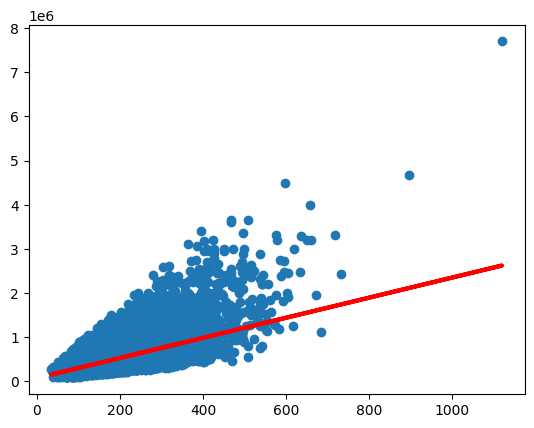

In [9]:
model_SVR.fit(X1, y)

prediction_SVR_living = model_SVR.predict(X1)

plt.scatter(X1,y)
plt.plot(X1, prediction_SVR_living, c="r", lw=3)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_SVR_living))}')
print(f'R2 : {r2_score(y, prediction_SVR_living)}')

KNN

In [10]:
knn_model.fit(X1, y)

prediction_KNN_living = knn_model.predict(X1)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_KNN_living))}')
print(f'R2 : {r2_score(y, prediction_KNN_living)}')

RMSE : 245279.20720218855
R2 : 0.438298502201644


### Feature `grade`

Regression linéaire

RMSE : 245510.09057040865
R2 : 0.43724053586845335


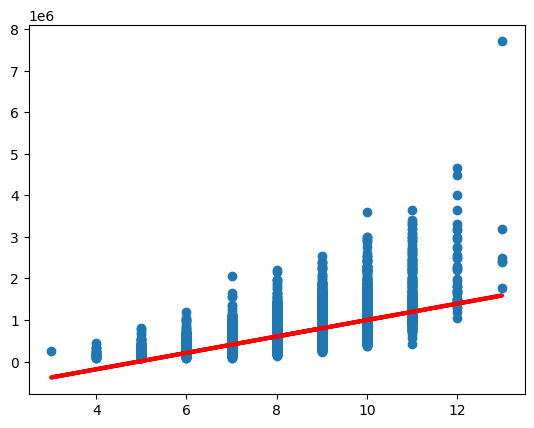

In [11]:
LinearRegression_model.fit(X2,y)


prediction_linear_grade = LinearRegression_model.predict(X2)
plt.scatter(X2,y)
plt.plot(X2, prediction_linear_grade, c="r", lw=3)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_linear_grade))}')
print(f'R2 : {r2_score(y, prediction_linear_grade)}')

Regression polynomiale

RMSE : 230868.70536356728
R2 : 0.5023611823912724


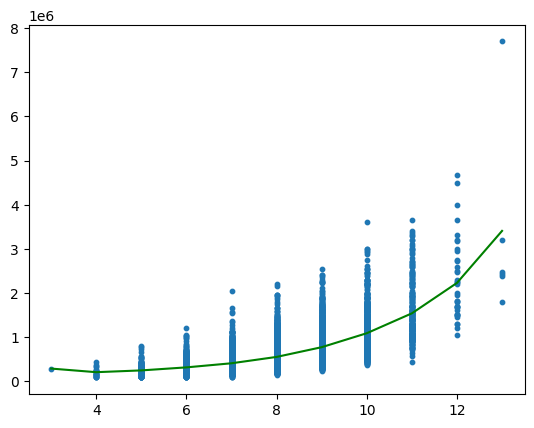

In [12]:
x_poly = poly_model.fit_transform(X2)

linear_model_for_poly.fit(x_poly, y)
y_poly_pred = linear_model_for_poly.predict(x_poly)



print(f'RMSE : {np.sqrt(mean_squared_error(y, y_poly_pred))}')
print(f'R2 : {r2_score(y, y_poly_pred)}')

import operator
plt.scatter(X2, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X2,y_poly_pred), key=sort_axis)
x_p, y_poly_pred_P = zip(*sorted_zip)
plt.plot(x_p, y_poly_pred_P, color='g')
plt.show()

Random forest

In [13]:
RandomForest_model.fit(X2, y)

prediction_forest_grade = RandomForest_model.predict(X2)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_forest_grade))}')
print(f'R2 : {r2_score(y, prediction_forest_grade)}')

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE : 241357.3886155557
R2 : 0.456117217146653


SVR

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE : 329139.0275081803
R2 : -0.011446410837133936


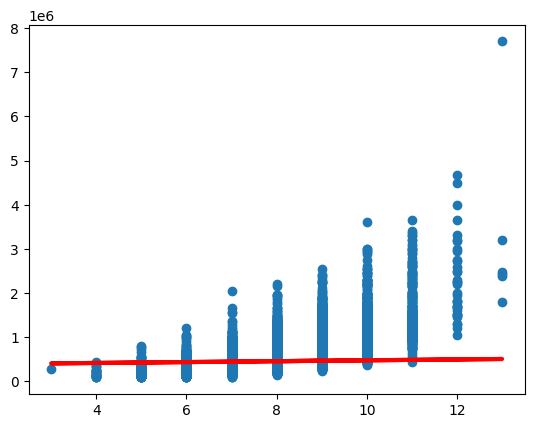

In [14]:
model_SVR.fit(X2, y)

prediction_SVR_grade = model_SVR.predict(X2)

plt.scatter(X2,y)
plt.plot(X2, prediction_SVR_grade, c="r", lw=3)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_SVR_grade))}')
print(f'R2 : {r2_score(y, prediction_SVR_grade)}')

KNN

In [15]:
knn_model.fit(X2, y)

prediction_KNN_grade = knn_model.predict(X2)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_KNN_grade))}')
print(f'R2 : {r2_score(y, prediction_KNN_grade)}')

RMSE : 252827.12429072664
R2 : 0.4031963861703336


### Feature `sqm_living` & `grade`

Regression linéaire

In [16]:
LinearRegression_model.fit(X3,y)

prediction_linear_bi = LinearRegression_model.predict(X3)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_linear_bi))}')
print(f'R2 : {r2_score(y, prediction_linear_bi)}')

RMSE : 226190.12880390152
R2 : 0.5223262121808192


Regression polynomiale

In [17]:
x_poly = poly_model.fit_transform(X3)

linear_model_for_poly.fit(x_poly, y)
y_poly_pred = linear_model_for_poly.predict(x_poly)

print(f'RMSE : {np.sqrt(mean_squared_error(y, y_poly_pred))}')
print(f'R2 : {r2_score(y, y_poly_pred)}')

RMSE : 210108.29102791307
R2 : 0.587835583463295


Random forest

In [18]:
RandomForest_model.fit(X3, y)

prediction_forest_bi = RandomForest_model.predict(X3)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_forest_bi))}')
print(f'R2 : {r2_score(y, prediction_forest_bi)}')

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE : 233985.34595369437
R2 : 0.48883461946665885


SVR

In [19]:
model_SVR.fit(X3, y)

prediction_SVR_bi = model_SVR.predict(X3)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_SVR_bi))}')
print(f'R2 : {r2_score(y, prediction_SVR_bi)}')

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE : 243566.52627885653
R2 : 0.4461153634630045


KNN

In [20]:
knn_model.fit(X3, y)

prediction_KNN_bi = knn_model.predict(X3)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_KNN_bi))}')
print(f'R2 : {r2_score(y, prediction_KNN_bi)}')

RMSE : 212317.76948164348
R2 : 0.5791214423542449


### All features

Regression linéaire

In [21]:
LinearRegression_model.fit(X4,y)

prediction_linear_all = LinearRegression_model.predict(X4)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_linear_all))}')
print(f'R2 : {r2_score(y, prediction_linear_all)}')

RMSE : 171124.26641031587
R2 : 0.7265944582750277


Regression polynomiale

In [22]:
x_poly = poly_model.fit_transform(X4)

linear_model_for_poly.fit(x_poly, y)
y_poly_pred = linear_model_for_poly.predict(x_poly)

print(f'RMSE : {np.sqrt(mean_squared_error(y, y_poly_pred))}')
print(f'R2 : {r2_score(y, y_poly_pred)}')

MemoryError: Unable to allocate 25.4 GiB for an array with shape (19256, 177100) and data type float64

Random forest

In [23]:
RandomForest_model.fit(X4, y)

prediction_forest_all = RandomForest_model.predict(X4)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_forest_all))}')
print(f'R2 : {r2_score(y, prediction_forest_all)}')

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE : 226067.55001113136
R2 : 0.5228438016166386


SVR

In [24]:
model_SVR.fit(X4, y)

prediction_SVR_all = model_SVR.predict(X4)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_SVR_all))}')
print(f'R2 : {r2_score(y, prediction_SVR_all)}')

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE : 216016.69266938252
R2 : 0.5643289128330129


KNN

In [25]:
knn_model.fit(X4, y)

prediction_KNN_all = knn_model.predict(X4)

print(f'RMSE : {np.sqrt(mean_squared_error(y, prediction_KNN_all))}')
print(f'R2 : {r2_score(y, prediction_KNN_all)}')

RMSE : 156465.21983255434
R2 : 0.7714297287554757
